In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
df=pd.read_csv('covid_19_india.csv')

In [89]:
df.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14330 entries, 0 to 14329
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       14330 non-null  int64 
 1   Date                      14330 non-null  object
 2   Time                      14330 non-null  object
 3   State/UnionTerritory      14330 non-null  object
 4   ConfirmedIndianNational   14330 non-null  object
 5   ConfirmedForeignNational  14330 non-null  object
 6   Cured                     14330 non-null  int64 
 7   Deaths                    14330 non-null  int64 
 8   Confirmed                 14330 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1007.7+ KB


In [91]:
df.describe()

Sno         Cured        Deaths     Confirmed
count  14330.000000  1.433000e+04  14330.000000  1.433000e+04
mean    7165.500000  1.570767e+05   2508.967062  1.720831e+05
std     4136.859014  3.177771e+05   6687.741239  3.487454e+05
min        1.000000  0.000000e+00      0.000000  0.000000e+00
25%     3583.250000  1.318750e+03     10.000000  2.445250e+03
50%     7165.500000  1.678500e+04    329.000000  2.164750e+04
75%    10747.750000  1.844340e+05   1923.750000  2.104340e+05
max    14330.000000  3.669548e+06  66179.000000  4.410085e+06

In [92]:
df['Active']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [93]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed', 'Active'],
      dtype='object')

In [94]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep'], dtype=object)

In [95]:
df.corr()

Sno     Cured    Deaths  Confirmed    Active
Sno        1.000000  0.398779  0.262835   0.383604  0.140683
Cured      0.398779  1.000000  0.900535   0.996234  0.627337
Deaths     0.262835  0.900535  1.000000   0.910493  0.654969
Confirmed  0.383604  0.996234  0.910493   1.000000  0.692208
Active     0.140683  0.627337  0.654969   0.692208  1.000000

In [96]:
df=df.drop('Date',axis=1)

In [97]:
my_object=df.select_dtypes(include='object')

In [98]:
my_numeric=df.select_dtypes(exclude='object')

In [99]:
my_obj_con=pd.get_dummies(my_object)

In [100]:
df_fin=pd.concat([my_obj_con,my_numeric],axis=1)

In [102]:
df_fin.head()

Time_10:00 AM  Time_5:00 PM  Time_6:00 PM  Time_7:30 PM  Time_8:00 AM  \
0              0             0             1             0             0   
1              0             0             1             0             0   
2              0             0             1             0             0   
3              0             0             1             0             0   
4              0             0             1             0             0   

   Time_8:30 PM  Time_9:30 PM  \
0             0             0   
1             0             0   
2             0             0   
3             0             0   
4             0             0   

   State/UnionTerritory_Andaman and Nicobar Islands  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   State/UnionTerritory_Andhra Pradesh  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   State/UnionTerritory_Arunachal Pradesh  ...  ConfirmedForeignNational_3  \
0                                       0  ...                           0   
1                                       0  ...                           0   
2                                       0  ...                           0   
3                                       0  ...                           0   
4                                       0  ...                           0   

   ConfirmedForeignNational_6  ConfirmedForeignNational_7  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   ConfirmedForeignNational_8  ConfirmedForeignNational_9  Sno  Cured  Deaths  \
0                           0                           0    1      0       0   
1                           0                           0    2      0       0   
2                           0                           0    3      0       0   
3                           0                           0    4      0       0   
4                           0                           0    5      0       0   

   Confirmed  Active  
0          1       1  
1          1       1  
2          2       2  
3          3       3  
4          3       3  

[5 rows x 125 columns]

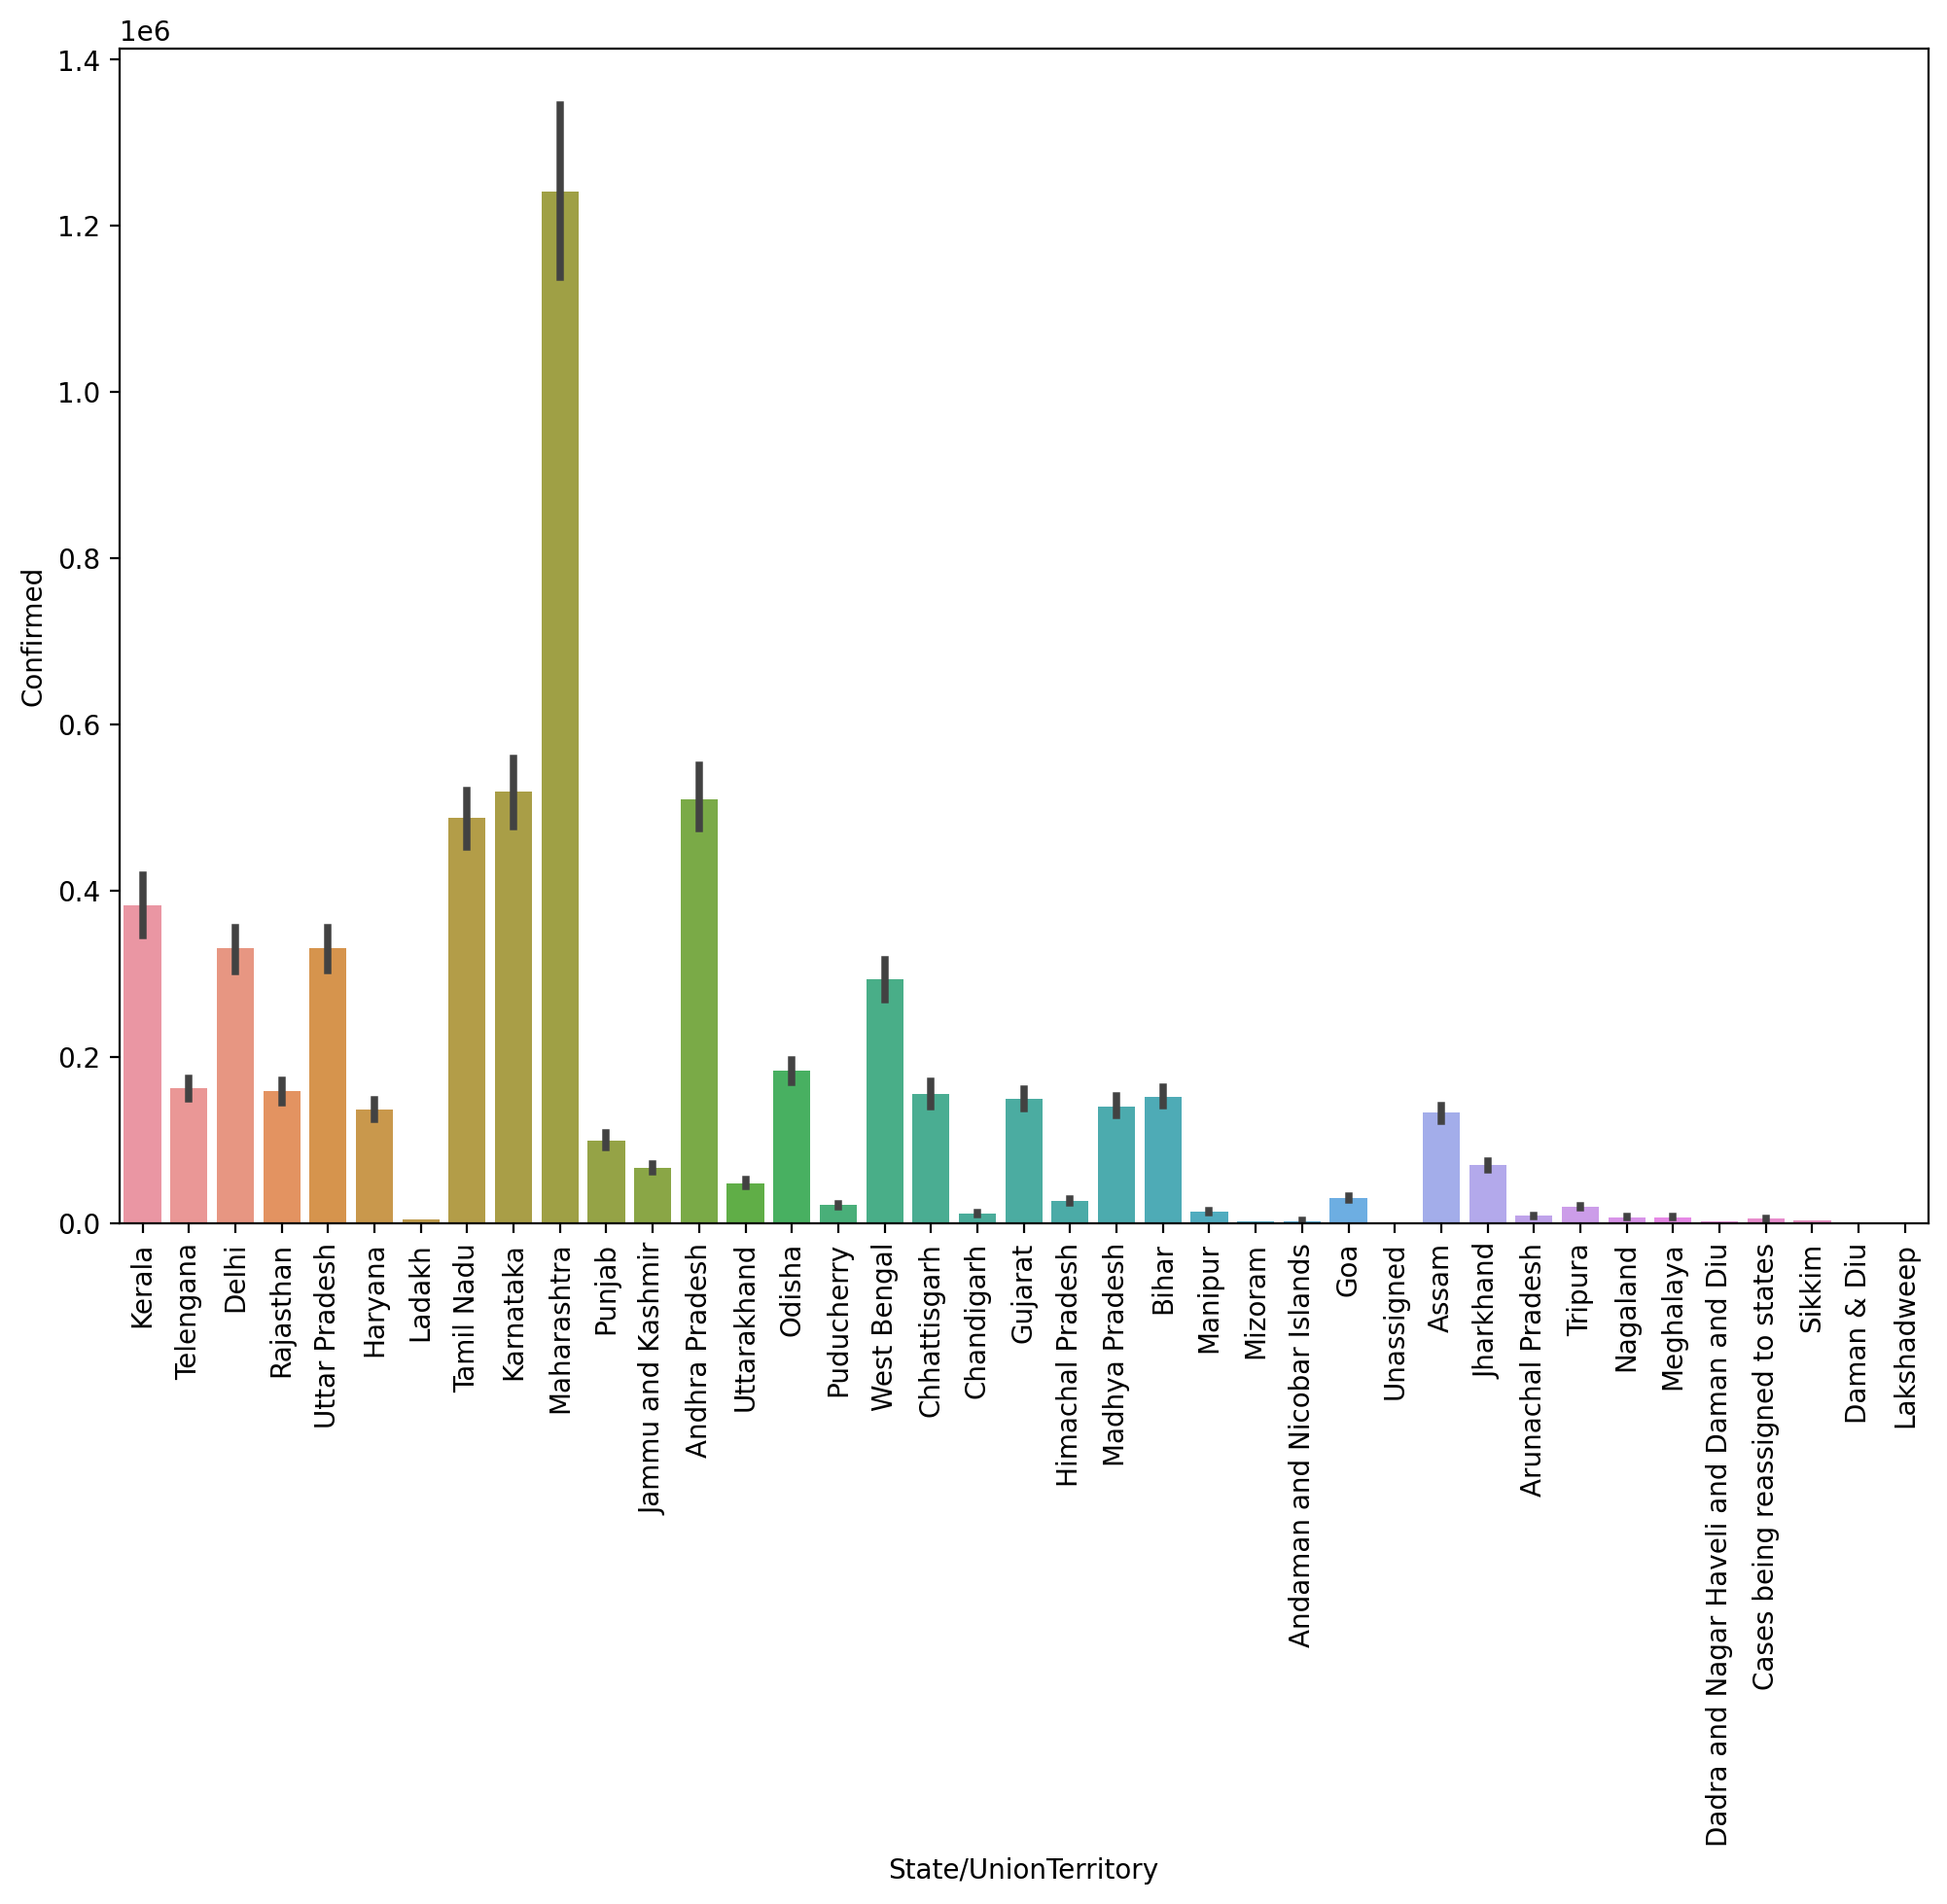

In [103]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x='State/UnionTerritory',y='Confirmed',data=df)
plt.xticks(rotation=90);

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X=df_fin.drop('Confirmed',axis=1)
y=df_fin['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [106]:
from sklearn.linear_model import ElasticNet

In [107]:
model=ElasticNet()

In [108]:
param_grid={'alpha':[0.5,1,10,50],'l1_ratio':[0.1,0.4,0.7,1]}

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
grid=GridSearchCV(model,param_grid)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [113]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.5, 1, 10, 50],
                         'l1_ratio': [0.1, 0.4, 0.7, 1]})

In [114]:

pred=grid.predict(X_test)

In [115]:
grid.best_estimator_

ElasticNet(alpha=50, l1_ratio=1)

In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
MSE=mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)

In [118]:
RMSE

84.2169768199317

In [119]:
from sklearn.ensemble import AdaBoostRegressor

In [120]:
model=AdaBoostRegressor()

In [121]:
model.fit(X_train,y_train)

AdaBoostRegressor()

In [122]:
pred=model.predict(X_test)

In [123]:
MSE=mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)

In [124]:
RMSE

58319.14178538107

In [125]:
#So the best model among the two is elastic net with l1 ratio 0f 1 / Lasso Regression

In [135]:
#considering only data and confirmed cases
df1=pd.read_csv('covid_19_india.csv')

In [136]:
df1.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [138]:
df1.Date.head()

0    2020-01-30
1    2020-01-31
2    2020-02-01
3    2020-02-02
4    2020-02-03
Name: Date, dtype: object

In [140]:
df1['Date']=pd.to_datetime(df1['Date'])

In [143]:
df1.Date.head()

0   2020-01-30
1   2020-01-31
2   2020-02-01
3   2020-02-02
4   2020-02-03
Name: Date, dtype: datetime64[ns]

In [147]:
df1['Date_year']=df1['Date'].dt.year
df1['Date_month']=df1['Date'].dt.month
df1['Date_week']=df1['Date'].dt.week
df1['Date_day']=df1['Date'].dt.day

<ipython-input-147-3ce816eef232>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['Date_week']=df1['Date'].dt.week


In [150]:
df1=df1.drop('Date',axis=1)

In [153]:
df1=df1.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [155]:
df1=df1.drop(['Cured','Deaths','Sno'],axis=1)

Time State/UnionTerritory  Confirmed  Date_year  Date_month  \
0      6:00 PM               Kerala          1       2020           1   
1      6:00 PM               Kerala          1       2020           1   
2      6:00 PM               Kerala          2       2020           2   
3      6:00 PM               Kerala          3       2020           2   
4      6:00 PM               Kerala          3       2020           2   
...        ...                  ...        ...        ...         ...   
14325  8:00 AM            Telengana     419966       2021           4   
14326  8:00 AM              Tripura      34862       2021           4   
14327  8:00 AM          Uttarakhand     162562       2021           4   
14328  8:00 AM        Uttar Pradesh    1153097       2021           4   
14329  8:00 AM          West Bengal     776345       2021           4   

       Date_week  Date_day  
0              5        30  
1              5        31  
2              5         1  
3              5         2  
4              6         3  
...          ...       ...  
14325         17        28  
14326         17        28  
14327         17        28  
14328         17        28  
14329         17        28  

[14330 rows x 7 columns]

In [164]:
my_object=df1.select_dtypes(include='object')
my_obj_con=pd.get_dummies(my_object)

In [165]:
my_numeric=df1.select_dtypes(exclude='object')

In [166]:
df1=pd.concat([my_obj_con,my_numeric],axis=1)

In [167]:
df1

Time_10:00 AM  Time_5:00 PM  Time_6:00 PM  Time_7:30 PM  Time_8:00 AM  \
0                  0             0             1             0             0   
1                  0             0             1             0             0   
2                  0             0             1             0             0   
3                  0             0             1             0             0   
4                  0             0             1             0             0   
...              ...           ...           ...           ...           ...   
14325              0             0             0             0             1   
14326              0             0             0             0             1   
14327              0             0             0             0             1   
14328              0             0             0             0             1   
14329              0             0             0             0             1   

       Time_8:30 PM  Time_9:30 PM  \
0                 0             0   
1                 0             0   
2                 0             0   
3                 0             0   
4                 0             0   
...             ...           ...   
14325             0             0   
14326             0             0   
14327             0             0   
14328             0             0   
14329             0             0   

       State/UnionTerritory_Andaman and Nicobar Islands  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
14325                                                 0   
14326                                                 0   
14327                                                 0   
14328                                                 0   
14329                                                 0   

       State/UnionTerritory_Andhra Pradesh  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
14325                                    0   
14326                                    0   
14327                                    0   
14328                                    0   
14329                                    0   

       State/UnionTerritory_Arunachal Pradesh  ...  \
0                                           0  ...   
1                                           0  ...   
2                                           0  ...   
3                                           0  ...   
4                                           0  ...   
...                                       ...  ...   
14325                                       0  ...   
14326                                       0  ...   
14327                                       0  ...   
14328                                       0  ...   
14329                                       0  ...   

       State/UnionTerritory_Tripura  State/UnionTerritory_Unassigned  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   
...                             ...                              ...   
14325                             0                                0   
14326                             1                                0   
14327                             0       

In [168]:
X=df_fin.drop('Confirmed',axis=1)
y=df_fin['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [169]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [170]:
model=ElasticNet()

In [171]:
param_grid={'alpha':[0.5,1,10,50,100],'l1_ratio':[0,0.1,0.5,0.7,1]}

In [172]:
grid=GridSearchCV(model,param_grid)

In [173]:
grid.fit(X_train,y_train)

/home/surya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96311420989656.19, tolerance: 107261832247.29408
  model = cd_fast.enet_coordinate_descent(
/home/surya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96622986377925.53, tolerance: 112316466409.93549
  model = cd_fast.enet_coordinate_descent(
/home/surya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95979478575837.25, tolerance: 110612425852.28348
  model = cd_fast.enet_coordinate_descent(
/home/surya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_de

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.5, 1, 10, 50, 100],
                         'l1_ratio': [0, 0.1, 0.5, 0.7, 1]})

In [174]:
grid.best_estimator_

ElasticNet(alpha=50, l1_ratio=1)

In [175]:
pred=grid.predict(X_test)

In [176]:
MSE=mean_squared_error(y_test,pred)

In [177]:
RMSE=np.sqrt(MSE)

In [178]:
RMSE

84.2169768199317

In [179]:
#BONUS WORK


In [180]:
df=pd.read_csv('covid_19_india.csv')

In [181]:
df.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [192]:
def sep(Date):
    [Year,month,date]=Date.split('-')
    return([Year,month,d)
    
    
df['Date'].apply(sep)

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
14325    2021
14326    2021
14327    2021
14328    2021
14329    2021
Name: Date, Length: 14330, dtype: object

NameError: name 'Year' is not defined